<a href="https://colab.research.google.com/github/vishesh-07/Summer-Training/blob/main/Day%206/Mask_No_Mask_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Mask/

/content/drive/MyDrive/Mask


In [3]:
!ls

archive.zip


In [4]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1319 sha256=db45ee2e9126964fec7908d4fc4a1c278ddfc79ec7f599f9fa632b73c0f3ac65
  Stored in directory: /root/.cache/pip/wheels/c5/05/b3/f7b36dbaaf76de31b718cde792c953bfd11d2414a72f204b56
Successfully built unzip


In [5]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/with_mask/1890.png  
  inflating: Dataset/with_mask/1891.png  
  inflating: Dataset/with_mask/1892.png  
  inflating: Dataset/with_mask/1893.png  
  inflating: Dataset/with_mask/1894.png  
  inflating: Dataset/with_mask/1895.png  
  inflating: Dataset/with_mask/1896.png  
  inflating: Dataset/with_mask/1897.png  
  inflating: Dataset/with_mask/1898.png  
  inflating: Dataset/with_mask/1899.png  
  inflating: Dataset/with_mask/19.png  
  inflating: Dataset/with_mask/190.png  
  inflating: Dataset/with_mask/1900.png  
  inflating: Dataset/with_mask/1901.png  
  inflating: Dataset/with_mask/1902.png  
  inflating: Dataset/with_mask/1903.png  
  inflating: Dataset/with_mask/1904.png  
  inflating: Dataset/with_mask/1905.png  
  inflating: Dataset/with_mask/1906.png  
  inflating: Dataset/with_mask/1907.png  
  inflating: Dataset/with_mask/1908.png  
  inflating: Dataset/with_mask/1909.png  
  inflating: Dataset/with_ma

In [6]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import splitfolders
splitfolders.ratio("Dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 8982 files [01:37, 92.29 files/s] 


In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 7185 images belonging to 3 classes.
Found 897 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


In [9]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 32)                1572896   
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,575,203
Trainable params: 1,575,203
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/50
898/898 [==============================] - 31s 34ms/step - loss: 0.6159 - acc: 0.7347 - val_loss: 0.4381 - val_acc: 0.8740
Epoch 2/50
898/898 [==============================] - 29s 32ms/step - loss: 0.4344 - acc: 0.8491 - val_loss: 0.3629 - val_acc: 0.8841
Epoch 3/50
898/898 [==============================] - 30s 34ms/step - loss: 0.3602 - acc: 0.8835 - val_loss: 0.3061 - val_acc: 0.9153
Epoch 4/50
898/898 [==============================] - 29s 32ms/step - loss: 0.3205 - acc: 0.8974 - val_loss: 0.2760 - val_acc: 0.9186
Epoch 5/50
898/898 [==============================] - 29s 33ms/step - loss: 0.2735 - acc: 0.9177 - val_loss: 0.3186 - val_acc: 0.9086
Epoch 6/50
898/898 [==============================] - 29s 33ms/step - loss: 0.2466 - acc: 0.9201 - val_loss: 0.2450 - val_acc: 0.9287
Epoch 7/50
898/898 [==============================] - 29s 32ms/step - loss: 0.2280 - acc: 0.9244 - val_loss: 0.2246 - val_acc: 0.9320
Epoch 8/50
898/898 [==============================] - 30s 33ms

In [11]:

model.save('mask_detection.h5')

In [12]:
from tensorflow.keras import models
model = models.load_model('mask_detection.h5')

In [13]:
model.save_weights('mask_detection_weights.h5')

In [14]:
model.load_weights('mask_detection_weights.h5')

In [15]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

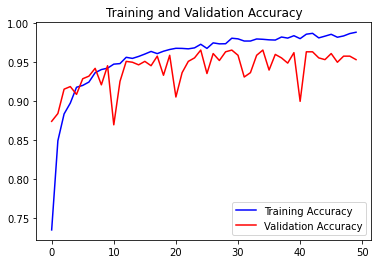

<Figure size 432x288 with 0 Axes>

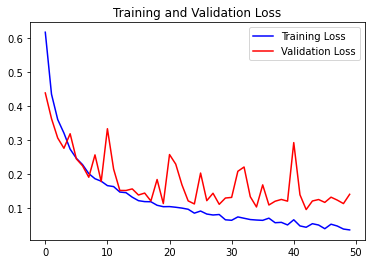

In [17]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [21]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

112/112 [==============================] - 4s 38ms/step - loss: 0.1504 - acc: 0.9578
[0.15037178993225098, 0.9577777981758118]
['loss', 'acc']
